# MSiA-420 Project
## In-vehicle Coupon Recommendation Dataset

## 0. Project Scope:
<p>
blahblahbalbhalbblah
</p>

## 1. About Dataset

| Variable name | Variable| Explanation|
|----------|------------|--------------|
|destination| No Urgent Place, Home, Work|
|passanger| Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)|
|weather| Sunny, Rainy, Snowy|
|temperature|55, 80, 30|
|time| 2PM, 10AM, 6PM, 7AM, 10PM|
|coupon| Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)|
|expiration| 1d, 2h (the coupon expires in 1 day or in 2 hours)|
|gender| Female, Male|
|age| 21, 46, 26, 31, 41, 50plus, 36, below21|
|maritalStatus| Unmarried partner, Single, Married partner, Divorced, Widowed|
|has_Children|1, 0|
|education| Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
|occupation| Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service,Community & Social Services, Office & Administrative Support,Construction & Extraction, Legal, Retired,Installation Maintenance & Repair, Transportation & Material Moving,Business & Financial, Protective Service,Food Preparation & Serving Related, Production Occupations,Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry|
|income| $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500|
|Bar| never, less1, 1~3, gt8, nan4~8 | how many times do you go to a bar every month?)|
|CoffeeHouse| never, less1, 4~8, 1~3, gt8, nan | how many times do you go to a coffeehouse every month?)|
|CarryAway|n4~8, 1~3, gt8, less1, never | how many times do you get take-away food every month?)|
|RestaurantLessThan20| 4~8, 1~3, less1, gt8, never | how many times do you go to a restaurant with an average expense per person of less than $20 every month?)|
|Restaurant20To50| 1~3, less1, never, gt8, 4~8, nan | how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)|
|toCoupon_GEQ15min|0,1 | driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)|
|toCoupon_GEQ25min|0, 1 | driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)|
|direction_same|0, 1 | whether the restaurant/bar is in the same direction as your current destination)|
|direction_opp|1, 0 | whether the restaurant/bar is in the same direction as your current destination)|
|Y|1, 0 (whether the coupon is accepted)|


## 2. EDA
### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Import dataset

In [3]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Overall data quality and description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

some columns have null values </br>
most are categorical except ```temperature``` , ```has_children``` , ```direction_opp```, ```Y (response variable)``` </br>
```direction_opp```, ```has_children``` is boolean


In [15]:
# percentage of null values
round(df.isnull().sum()/ len(df)*100,2)

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

columns ```car```, ```bar```, ```CoffeeHouse```, ```CarryAway```, ```RestaurantLessThan20```, ```Restaurant20To50``` have null values</br>
concern: ~99% ```car``` is Null

In [16]:
df.nunique() # basically all variables are categorical since integer values are not continuous

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

### check class imbalance for response variable

(0.4315673289183223, 0.5684326710816777)

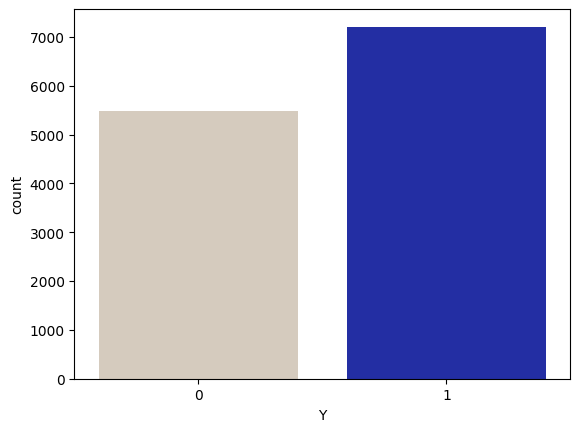

In [44]:
sns.countplot(x=df['Y'],palette=['#D9CBBA','#0E1CB8'])
len(df[df['Y'] == 0])/len(df),len(df[df['Y'] == 1])/len(df)

### check overall trend in response to response variable

<AxesSubplot: xlabel='age', ylabel='Count'>

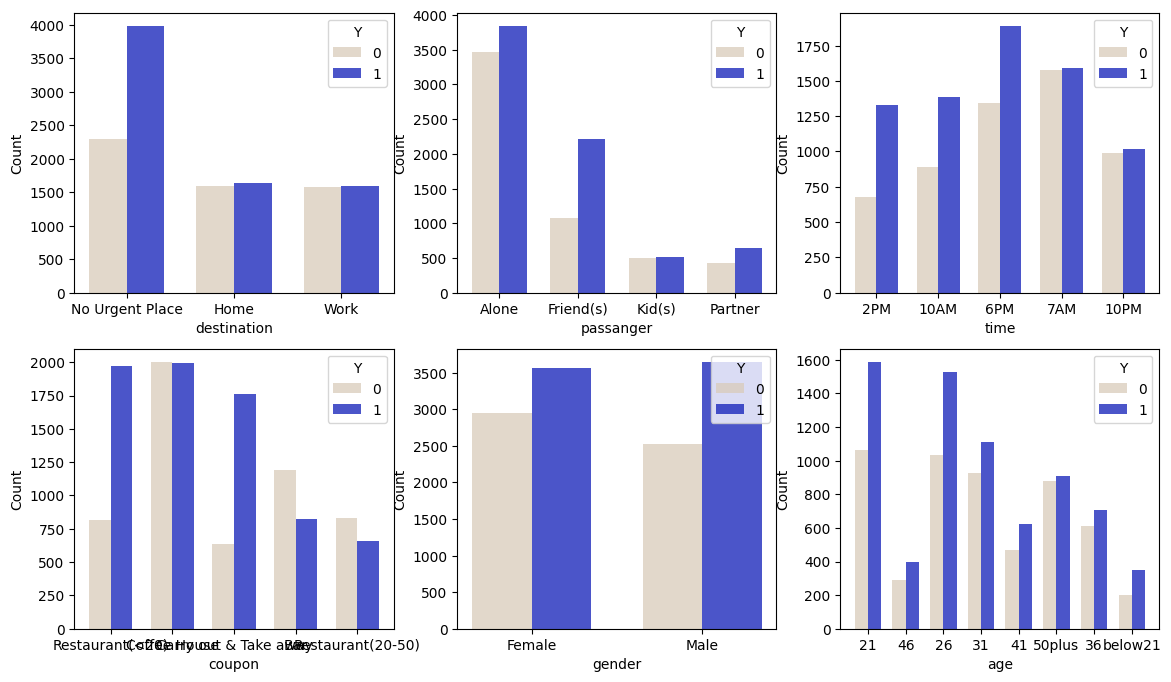

In [66]:
fig, axes = plt.subplots(2,3, figsize=(14,8))

sns.histplot(df,x='destination',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax= axes[0,0])
sns.histplot(df,x='passanger',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=axes[0,1])
sns.histplot(df,x='time',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=axes[0,2])

sns.histplot(df,x='coupon',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax= axes[1,0])
sns.histplot(df,x='gender',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=axes[1,1])
sns.histplot(df,x='age',hue='Y',multiple="dodge",shrink=0.7,palette=['#D9CBBA','#0E1CB8'], edgecolor=None, ax=axes[1,2])